In [41]:
import torch
import torchaudio
import librosa
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import Audio

# Get Kinect data

In [32]:


n_channels=1
hop_length = 160
frame_length = 800

frame = torch.zeros([n_channels,frame_length])
hop = torch.zeros([n_channels,hop_length])

data1 = [37, 0, 38, 0, 31, 0, 21, 0, 14, 0, 8, 0, 3, 0, 255, 255, 255, 255, 255, 255, 7, 0, 23, 0, 34, 0, 38, 0, 39, 0, 37, 0, 28, 0, 19, 0, 8, 0, 0, 0, 252, 255, 250, 255, 252, 255, 253, 255, 4, 0, 12, 0, 13, 0, 14, 0, 10, 0, 0, 0, 251, 255, 248, 255, 246, 255, 241, 255, 233, 255, 226, 255, 222, 255, 214, 255, 202, 255, 197, 255, 199, 255, 208, 255, 223, 255, 240, 255, 0, 0, 14, 0, 22, 0, 26, 0, 31, 0, 32, 0, 35, 0, 37, 0, 33, 0, 27, 0, 18, 0, 10, 0, 5, 0, 6, 0, 15, 0, 22, 0, 20, 0, 23, 0, 33, 0, 44, 0, 45, 0, 42, 0, 44, 0, 47, 0, 41, 0, 23, 0, 11, 0, 11, 0, 11, 0, 7, 0, 5, 0, 4, 0, 3, 0, 3, 0, 2, 0, 3, 0, 7, 0, 7, 0, 8, 0, 11, 0, 6, 0, 255, 255, 250, 255, 252, 255, 2, 0, 5, 0, 10, 0, 22, 0, 31, 0, 29, 0, 24, 0, 20, 0, 19, 0, 27, 0, 37, 0, 48, 0, 61, 0, 72, 0, 79, 0, 81, 0, 78, 0, 69, 0, 63, 0, 64, 0, 63, 0, 56, 0, 51, 0, 46, 0, 41, 0, 36, 0, 35, 0, 41, 0, 45, 0, 45, 0, 36, 0, 23, 0, 16, 0, 10, 0, 3, 0, 2, 0, 5, 0, 6, 0, 10, 0, 15, 0, 20, 0, 25, 0, 25, 0, 24, 0, 26, 0, 32, 0, 37, 0, 43, 0, 51, 0, 55, 0, 57, 0, 64, 0, 62, 0, 52, 0, 47, 0, 40, 0, 32, 0, 24, 0, 14, 0, 14, 0, 27, 0, 37, 0, 37, 0, 33, 0, 28, 0, 34, 0, 42, 0, 37, 0, 30, 0, 27, 0, 19, 0, 2, 0]
data2 = [243, 255, 236, 255, 236, 255, 242, 255, 247, 255, 248, 255, 240, 255, 230, 255, 229, 255, 240, 255, 1, 0, 6, 0, 4, 0, 253, 255, 243, 255, 242, 255, 246, 255, 248, 255, 249, 255, 247, 255, 245, 255, 239, 255, 231, 255, 238, 255, 248, 255, 238, 255, 235, 255, 3, 0, 12, 0, 3, 0, 14, 0, 23, 0, 13, 0, 13, 0, 26, 0, 19, 0, 14, 0, 30, 0, 33, 0, 22, 0, 27, 0, 27, 0, 13, 0, 9, 0, 19, 0, 42, 0, 49, 0, 25, 0, 21, 0, 40, 0, 36, 0, 14, 0, 254, 255, 231, 255, 199, 255, 182, 255, 169, 255, 161, 255, 186, 255, 201, 255, 178, 255, 170, 255, 203, 255, 225, 255, 192, 255, 151, 255, 176, 255, 220, 255, 201, 255, 164, 255, 170, 255, 179, 255, 183, 255, 196, 255, 191, 255, 193, 255, 231, 255, 254, 255, 1, 0, 19, 0, 30, 0, 20, 0, 20, 0, 40, 0, 55, 0, 54, 0, 52, 0, 78, 0, 107, 0, 56, 0, 231, 255, 253, 255, 43, 0, 252, 255, 210, 255, 244, 255, 18, 0, 17, 0, 20, 0, 36, 0, 48, 0, 29, 0, 239, 255, 203, 255, 194, 255, 190, 255, 177, 255, 172, 255, 193, 255, 218, 255, 217, 255, 209, 255, 232, 255, 1, 0, 247, 255, 228, 255, 230, 255, 239, 255, 237, 255, 220, 255, 207, 255, 215, 255, 223, 255, 210, 255, 188, 255, 194, 255, 222, 255, 228, 255, 211, 255, 209, 255, 233, 255, 252, 255, 247, 255, 238, 255, 242, 255, 234, 255, 212, 255, 205, 255, 204, 255, 188, 255, 185, 255, 202, 255, 204, 255, 201, 255, 219, 255, 232, 255, 222, 255, 206, 255, 204, 255, 203, 255, 188, 255, 176, 255, 181, 255, 184, 255, 165, 255, 160, 255, 182, 255, 184, 255, 169, 255, 160, 255]
data3 = [156, 255, 148, 255, 133, 255, 127, 255, 134, 255, 143, 255, 154, 255, 170, 255, 182, 255, 182, 255, 171, 255, 157, 255, 138, 255, 114, 255, 100, 255, 103, 255, 117, 255, 140, 255, 163, 255, 185, 255, 197, 255, 201, 255, 201, 255, 191, 255, 181, 255, 179, 255, 177, 255, 183, 255, 190, 255, 200, 255, 214, 255, 222, 255, 236, 255, 1, 0, 8, 0, 2, 0, 255, 255, 252, 255, 255, 255, 4, 0, 250, 255, 231, 255, 218, 255, 214, 255, 216, 255, 219, 255, 209, 255, 203, 255, 205, 255, 198, 255, 186, 255, 175, 255, 166, 255, 161, 255, 162, 255, 167, 255, 179, 255, 195, 255, 206, 255, 211, 255, 214, 255, 215, 255, 215, 255, 217, 255, 219, 255, 221, 255, 221, 255, 211, 255, 202, 255, 195, 255, 190, 255, 191, 255, 198, 255, 206, 255, 212, 255, 214, 255, 215, 255, 213, 255, 211, 255, 211, 255, 210, 255, 202, 255, 189, 255, 185, 255, 186, 255, 187, 255, 187, 255, 185, 255, 184, 255, 191, 255, 196, 255, 195, 255, 192, 255, 192, 255, 199, 255, 204, 255, 203, 255, 193, 255, 193, 255, 197, 255, 192, 255, 191, 255, 200, 255, 211, 255, 218, 255, 222, 255, 225, 255, 231, 255, 237, 255, 232, 255, 218, 255, 212, 255, 212, 255, 212, 255, 211, 255, 215, 255, 220, 255, 225, 255, 229, 255, 221, 255, 209, 255, 199, 255, 198, 255, 199, 255, 201, 255, 210, 255, 215, 255, 213, 255, 215, 255, 223, 255, 235, 255, 249, 255, 251, 255, 245, 255, 254, 255, 2, 0, 246, 255, 239, 255, 241, 255, 246, 255, 247, 255, 244, 255, 235, 255, 232, 255, 235, 255, 239, 255, 247, 255, 251, 255, 246, 255, 243, 255, 239, 255, 224, 255, 212, 255, 208, 255, 205, 255, 201, 255, 193, 255, 189, 255, 193, 255, 202, 255]
data4 = [216, 255, 230, 255, 226, 255, 221, 255, 238, 255, 253, 255, 1, 0, 8, 0, 13, 0, 11, 0, 6, 0, 2, 0, 3, 0, 16, 0, 33, 0, 33, 0, 24, 0, 31, 0, 39, 0, 44, 0, 52, 0, 51, 0, 44, 0, 44, 0, 43, 0, 31, 0, 18, 0, 7, 0, 249, 255, 237, 255, 230, 255, 225, 255, 222, 255, 217, 255, 215, 255, 212, 255, 210, 255, 218, 255, 227, 255, 230, 255, 231, 255, 231, 255, 230, 255, 238, 255, 255, 255, 15, 0, 21, 0, 24, 0, 27, 0, 26, 0, 23, 0, 21, 0, 19, 0, 25, 0, 31, 0, 28, 0, 27, 0, 26, 0, 18, 0, 14, 0, 15, 0, 10, 0, 251, 255, 240, 255, 238, 255, 235, 255, 230, 255, 224, 255, 221, 255, 220, 255, 224, 255, 235, 255, 241, 255, 243, 255, 254, 255, 7, 0, 10, 0, 17, 0, 21, 0, 18, 0, 13, 0, 4, 0, 247, 255, 237, 255, 233, 255, 240, 255, 251, 255, 5, 0, 15, 0, 23, 0, 25, 0, 22, 0, 26, 0, 34, 0, 43, 0, 47, 0, 40, 0, 31, 0, 24, 0, 23, 0, 24, 0, 23, 0, 12, 0, 1, 0, 254, 255, 0, 0, 4, 0, 4, 0, 4, 0, 7, 0, 10, 0, 8, 0, 6, 0, 14, 0, 30, 0, 34, 0, 31, 0, 34, 0, 41, 0, 40, 0, 36, 0, 35, 0, 43, 0, 58, 0, 66, 0, 64, 0, 61, 0, 64, 0, 65, 0, 61, 0, 62, 0, 71, 0, 73, 0, 65, 0, 44, 0, 18, 0, 8, 0, 255, 255, 233, 255, 212, 255, 202, 255, 196, 255, 195, 255, 198, 255, 204, 255, 208, 255, 208, 255, 209, 255, 207, 255, 204, 255, 204, 255, 201, 255, 197, 255, 201, 255, 217, 255, 234, 255, 251, 255, 11, 0, 25, 0, 37, 0]
data5 = [37, 0, 37, 0, 47, 0, 57, 0, 62, 0, 65, 0, 73, 0, 76, 0, 69, 0, 61, 0, 56, 0, 58, 0, 61, 0, 58, 0, 49, 0, 42, 0, 45, 0, 51, 0, 56, 0, 58, 0, 54, 0, 46, 0, 35, 0, 27, 0, 24, 0, 24, 0, 24, 0, 21, 0, 18, 0, 21, 0, 22, 0, 16, 0, 11, 0, 10, 0, 12, 0, 20, 0, 29, 0, 41, 0, 52, 0, 54, 0, 46, 0, 36, 0, 27, 0, 19, 0, 14, 0, 6, 0, 253, 255, 249, 255, 254, 255, 1, 0, 251, 255, 252, 255, 6, 0, 14, 0, 17, 0, 24, 0, 34, 0, 37, 0, 28, 0, 21, 0, 18, 0, 13, 0, 8, 0, 2, 0, 250, 255, 244, 255, 246, 255, 252, 255, 248, 255, 246, 255, 255, 255, 9, 0, 19, 0, 22, 0, 17, 0, 13, 0, 14, 0, 16, 0, 8, 0, 0, 0, 0, 0, 253, 255, 244, 255, 235, 255, 230, 255, 232, 255, 238, 255, 243, 255, 247, 255, 250, 255, 247, 255, 245, 255, 244, 255, 244, 255, 251, 255, 253, 255, 251, 255, 252, 255, 3, 0, 6, 0, 5, 0, 1, 0, 252, 255, 250, 255, 248, 255, 249, 255, 255, 255, 9, 0, 20, 0, 29, 0, 36, 0, 45, 0, 54, 0, 58, 0, 55, 0, 44, 0, 41, 0, 45, 0, 54, 0, 63, 0, 63, 0, 58, 0, 49, 0, 45, 0, 43, 0, 36, 0, 30, 0, 24, 0, 21, 0, 18, 0, 15, 0, 5, 0, 250, 255, 246, 255, 244, 255, 239, 255, 235, 255, 234, 255, 244, 255, 2, 0, 1, 0, 248, 255, 242, 255, 241, 255, 239, 255, 237, 255, 235, 255, 240, 255, 245, 255, 244, 255, 240, 255, 238, 255, 239, 255, 244, 255, 247, 255, 247, 255, 251, 255, 2, 0, 6, 0, 10, 0]

In [33]:
hop = torch.from_numpy(librosa.util.buf_to_float(np.asarray(data1, dtype=np.uint8), n_bytes=2)).view(n_channels,-1)

# Roll the frame and replace old hop data with new hop data
frame = torch.roll(frame, -hop_length, 1)
frame[:,-hop_length:] = hop

In [34]:
hop = torch.from_numpy(librosa.util.buf_to_float(np.asarray(data2, dtype=np.uint8), n_bytes=2)).view(n_channels,-1)

# Roll the frame and replace old hop data with new hop data
frame = torch.roll(frame, -hop_length, 1)
frame[:,-hop_length:] = hop

In [35]:
hop = torch.from_numpy(librosa.util.buf_to_float(np.asarray(data3, dtype=np.uint8), n_bytes=2)).view(n_channels,-1)

# Roll the frame and replace old hop data with new hop data
frame = torch.roll(frame, -hop_length, 1)
frame[:,-hop_length:] = hop

In [36]:
hop = torch.from_numpy(librosa.util.buf_to_float(np.asarray(data4, dtype=np.uint8), n_bytes=2)).view(n_channels,-1)

# Roll the frame and replace old hop data with new hop data
frame = torch.roll(frame, -hop_length, 1)
frame[:,-hop_length:] = hop

In [37]:
hop = torch.from_numpy(librosa.util.buf_to_float(np.asarray(data5, dtype=np.uint8), n_bytes=2)).view(n_channels,-1)

# Roll the frame and replace old hop data with new hop data
frame = torch.roll(frame, -hop_length, 1)
frame[:,-hop_length:] = hop

In [38]:
print(frame)

tensor([[ 1.1292e-03,  1.1597e-03,  9.4604e-04,  6.4087e-04,  4.2725e-04,
          2.4414e-04,  9.1553e-05, -3.0518e-05, -3.0518e-05, -3.0518e-05,
          2.1362e-04,  7.0190e-04,  1.0376e-03,  1.1597e-03,  1.1902e-03,
          1.1292e-03,  8.5449e-04,  5.7983e-04,  2.4414e-04,  0.0000e+00,
         -1.2207e-04, -1.8311e-04, -1.2207e-04, -9.1553e-05,  1.2207e-04,
          3.6621e-04,  3.9673e-04,  4.2725e-04,  3.0518e-04,  0.0000e+00,
         -1.5259e-04, -2.4414e-04, -3.0518e-04, -4.5776e-04, -7.0190e-04,
         -9.1553e-04, -1.0376e-03, -1.2817e-03, -1.6479e-03, -1.8005e-03,
         -1.7395e-03, -1.4648e-03, -1.0071e-03, -4.8828e-04,  0.0000e+00,
          4.2725e-04,  6.7139e-04,  7.9346e-04,  9.4604e-04,  9.7656e-04,
          1.0681e-03,  1.1292e-03,  1.0071e-03,  8.2397e-04,  5.4932e-04,
          3.0518e-04,  1.5259e-04,  1.8311e-04,  4.5776e-04,  6.7139e-04,
          6.1035e-04,  7.0190e-04,  1.0071e-03,  1.3428e-03,  1.3733e-03,
          1.2817e-03,  1.3428e-03,  1.

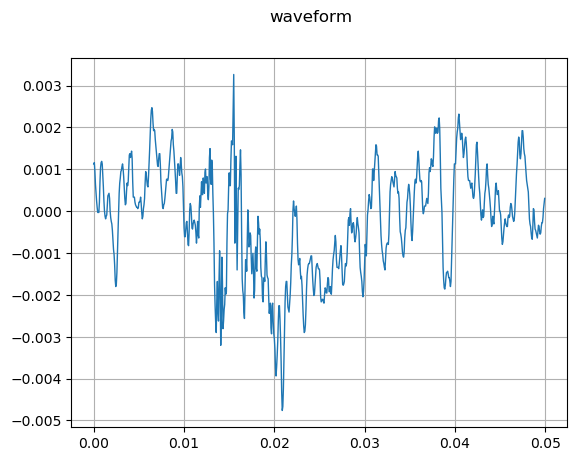

In [39]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)
    
plot_waveform(frame,16000)

In [42]:
Audio(frame, rate=16000)